**Morris' method with *sensitivity***

In [1]:
install.packages("sensitivity")


The downloaded binary packages are in
	/var/folders/wn/p_gs3z3j00b8whbmffbzr8g00000gn/T//RtmpW10Ooc/downloaded_packages


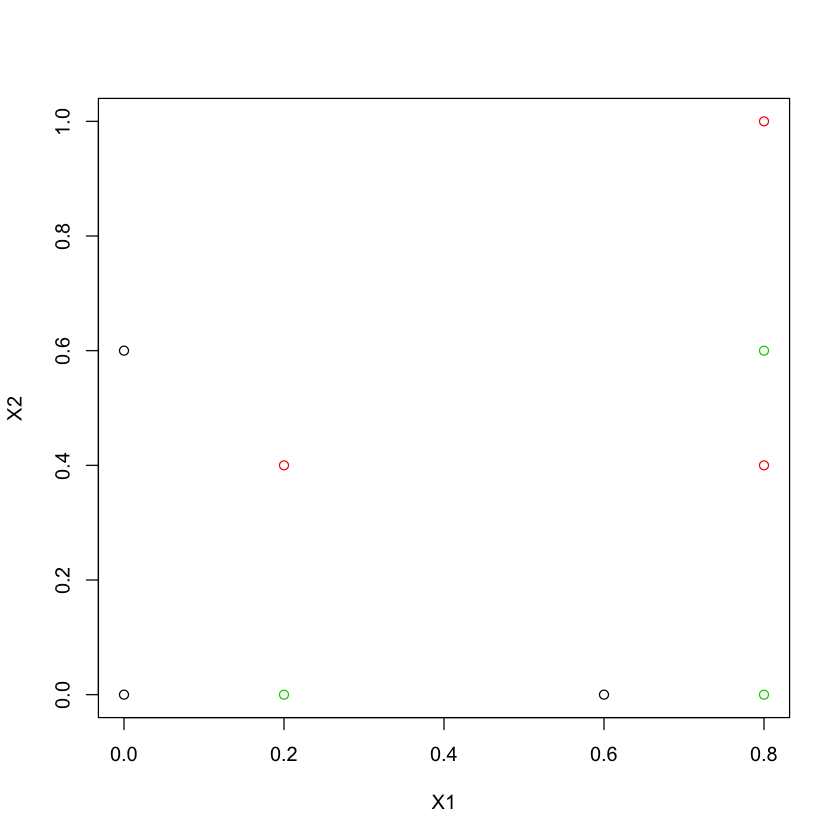

In [9]:
## Morris method ##

## OAT design ##
library(sensitivity)
set.seed(825367)
sa<-morris(model=NULL, factors=2,r=3,design=list(type="oat",levels=6,grid.jump=3))
plot(x=sa$X[,1],y=sa$X[,2],cex=1,xlab="X1",ylab="X2",
     col=c(rep(1,3),rep(2,3),rep(3,3),rep(4,3)))

**Morris' test fuction**
$$f({\bf x})=\beta_0+\sum_{i=1}^{20}\beta_iw_i+\sum_{1 \leq i<j\leq 20}\beta_{i,j}w_iw_j+\sum_{1 \leq i<j<l\leq20}\beta_{i,j,l}w_iw_jw_l+\sum_{1\leq i<j<l<s\leq20}\beta_{i,j,l,s}w_iw_jw_lw_s$$
where
$$w_i=2\times(x_i-\frac{1}{2}) \, , \; \forall \, i\neq3,5,7 \;\; \;w_i=2\times(1.1\frac{x_i}{x_i+0.1}-\frac{1}{2})\, , \; \forall \, i=3,5,7$$

$$\beta_i=20 \, , \; \forall \, i=1, \ldots, 10$$

$$\beta_{i,j}=-15 \, , \; \forall \, i,j=1,2, \ldots , 6 \; i<j$$

$$\beta_{i,j,l} =-10 \, , \; \forall \, i,j,l=1,2, \ldots , 5 \; i<j<l$$

$$\beta_{1,2,3,4}=5$$

$$X_i \sim \mathcal{U}\left([0,1]\right) \, , \; \forall \, i=1, \ldots , 20\,.$$

[1] 210


Call:
morris(model = morris.fun, factors = 20, r = 10, design = list(type = "oat",     levels = 7, grid.jump = 1))

Model runs: 210 
            mu   mu.star     sigma
X1  29.7281327 56.117050 58.184935
X2  16.0104669 49.651672 56.282563
X3  -2.1926380 45.455171 74.897265
X4  24.6039628 67.520640 71.884732
X5   6.0177336 42.062557 59.458078
X6  21.0744742 38.705696 37.197907
X7  40.9935373 40.993537 61.547834
X8  40.5109562 40.510956  3.933315
X9  38.3738892 38.373889  7.558297
X10 40.3138759 40.313876  4.421084
X11 -0.9794748  2.843718  3.322926
X12  1.7337270  3.771752  4.977646
X13 -0.5564591  4.399565  5.694769
X14 -1.9772719  7.185921  8.922375
X15 -1.1562960  3.472231  4.233641
X16  1.1223938  3.178819  3.783444
X17 -0.1868669  2.920211  3.538295
X18  0.1095662  3.564161  4.576195
X19 -1.2089749  4.748379  5.440537
X20 -2.2666191  5.161955  5.408059


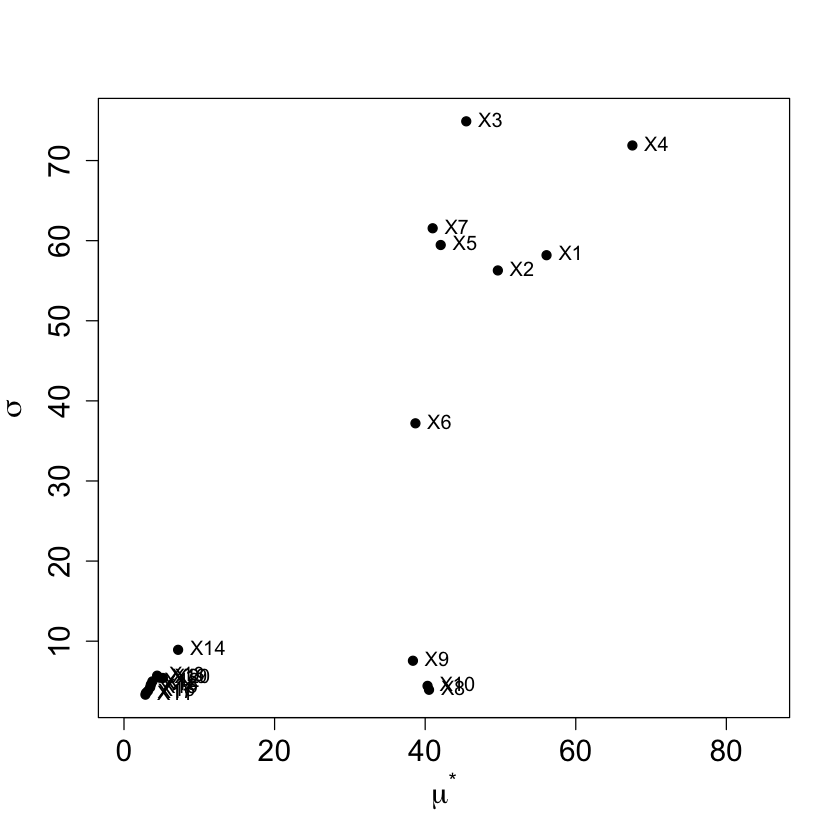

In [10]:
## Application to the Morris fuction, in dimension d=20 ##
library(sensitivity)
set.seed(12345)
sa<-morris(model=morris.fun, factors=20,r=10,design=list(type="oat",
levels=7,grid.jump=1))
# length of Morris' design #
length(sa$y)
# Morris' statistics computation #
print(sa)
# Morris' graph #
plot(sa,xlim=c(0,85),cex=1.5,cex.axis=1.5,cex.lab=1.5)

**Local sensitivity analysis with partial derivatives**

In [11]:
## Partial derivatives at some nominal point using finite differences ##
d<-20
X0<-matrix(rep(0.5,d),nrow=1)
# the argument varprior is necessary but used at this stage
# perturb=1.01 means that a 1% perturbation has been used around the central point
der1<-delsa(model=morris.fun,perturb=1.01,X0=X0,varprior=rep(2,d))
print(der1$deriv[,1:d],digits = 2)

 [1] -23.15 -25.44   4.38 -24.28   4.17 -10.82  11.58  40.83  39.55  40.53
[11]  -2.29   2.85   0.61  -0.97  -3.48   2.97  -0.30  -1.42  -4.64  -2.76


In [12]:
## Partial derivatives at some nominal point using finite differences ##
d<-20
X0<-matrix(rep(1,d),nrow=1)
# the argument varprior is necessary but not used at this stage
# perturb=1.01 means that a 1% perturbation has been used around the central point
der1<-delsa(model=morris.fun,perturb=1.01,X0=X0,varprior=rep(2,d))
print(der1$deriv[,1:d],digits = 2)

 [1] -222.39 -226.57  -20.65 -223.60  -20.86 -111.22    3.03   46.62   33.59
[10]   35.74   -4.40   -4.85   -3.73   -3.93   -9.84    1.71    0.85   -4.20
[19]  -21.62   12.05


**Distributed evaluation of local sensitivities**

First-order local sensitivities for model $f$ with $d$ uncertain inputs $X_1, \ldots X_d$ are defined as:

$$\xi_j=\left(\frac{\partial f(\bf x)}{\partial x_j}|_{{\bf x}={\bf x}^{\star}}\right)^2\frac{\textrm{Var }X_j}{\textrm{Var } f({\bf X})}\,, \; \forall \, j=1, \ldots d \, .$$



In [13]:
install.packages("randtoolbox")


The downloaded binary packages are in
	/var/folders/wn/p_gs3z3j00b8whbmffbzr8g00000gn/T//RtmpW10Ooc/downloaded_packages


HeterDisc function

$$f({\bf x})= \left\{
    \begin{array}{ll}
        \displaystyle \sin(\pi\frac{x_1}{5})+\frac{2}{10}\cos(4\pi\frac{x_1}{5})+\frac{x_3}{100}(x_2-10) & \mbox{if } x_1<10\\
       \displaystyle  \frac{x_3}{100}(x_2-10)+\frac{1}{10}(x_4-20) & \mbox{otherwise.}
    \end{array}
\right.
$$

$$X_j \sim \mathcal{U}([0,20]) \; \forall \, j=1, \ldots , 4 \, .$$

In [14]:
d<-4
delsa<-delsa(model=heterdisc.fun,perturb=1.01,par.ranges=replicate(d,c(0,20),
simplify=FALSE),samples=5,method="sobol")
print(delsa)
delsa$deriv
delsa$delsafirst


Call:
delsa(model = heterdisc.fun, perturb = 1.01, par.ranges = replicate(d,     c(0, 20), simplify = FALSE), samples = 5, method = "sobol")

Locations calculated: 5 

Model runs: 25 

Summary of first order indices across parameter space:
       V1                V2                 V3                 V4        
 Min.   :0.00000   Min.   :0.005678   Min.   :0.000000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.038462   1st Qu.:0.005678   1st Qu.:0.0000  
 Median :0.00000   Median :0.500000   Median :0.036123   Median :0.2857  
 Mean   :0.20989   Mean   :0.418016   Mean   :0.091877   Mean   :0.2802  
 3rd Qu.:0.06079   3rd Qu.:0.642857   3rd Qu.:0.071429   3rd Qu.:0.5000  
 Max.   :0.98864   Max.   :0.903082   Max.   :0.346154   Max.   :0.6154  


[,1]        [,2]  [,3]   [,4]
[1,]  0.00000000 0.100  0.000 0.1 
[2,]  0.00000000 0.150 -0.050 0.1 
[3,] -0.65975638 0.050  0.050 0.0 
[4,] -0.03243233 0.125 -0.025 0.0 
[5,]  0.00000000 0.025  0.075 0.1

[,1]       [,2]        [,3]        [,4]     
[1,] 0.00000000 0.500000000 0.000000000 0.5000000
[2,] 0.00000000 0.642857143 0.071428571 0.2857143
[3,] 0.98864355 0.005678224 0.005678224 0.0000000
[4,] 0.06079441 0.903082301 0.036123292 0.0000000
[5,] 0.00000000 0.038461538 0.346153846 0.6153846

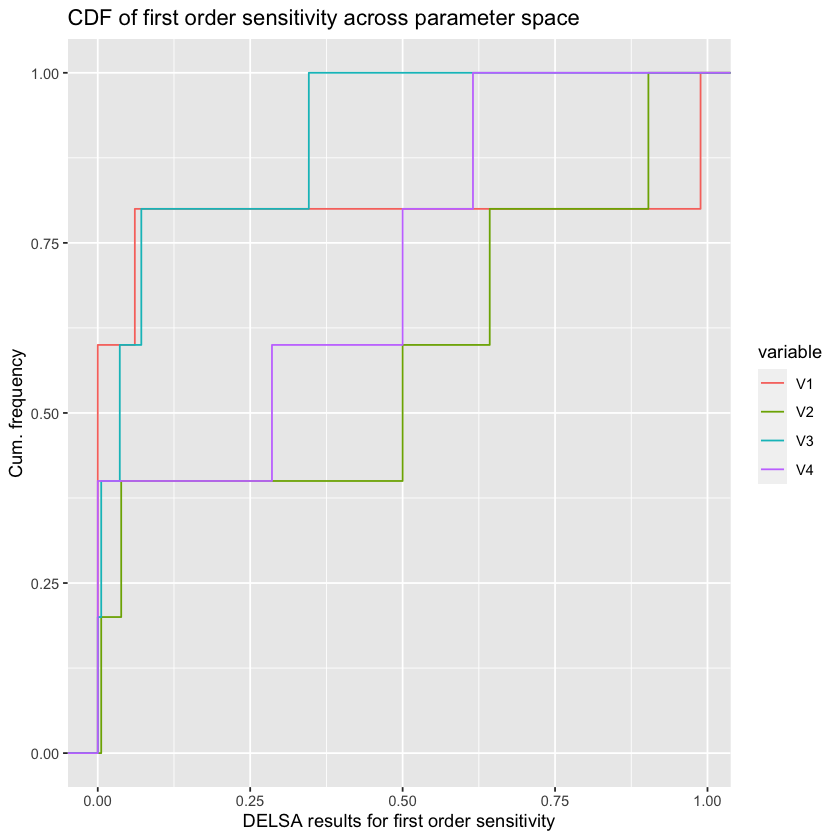

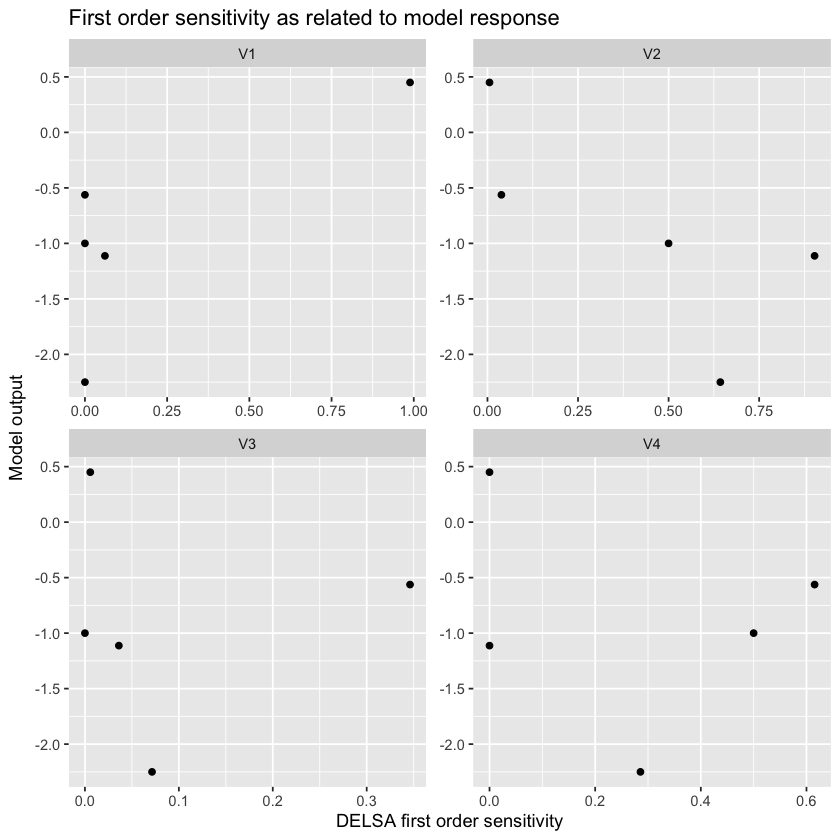

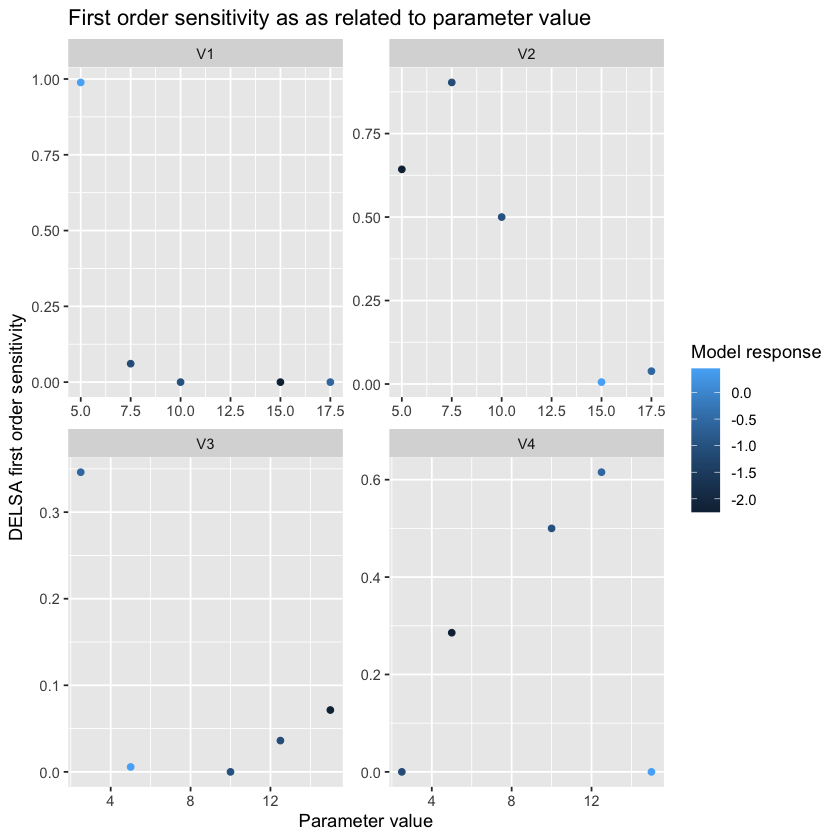

In [8]:
plot(delsa)

In [15]:
d<-4
delsa<-delsa(model=heterdisc.fun,perturb=1.01,par.ranges=replicate(d,c(0,20),
simplify=FALSE),samples=500,method="sobol")
print(delsa)


Call:
delsa(model = heterdisc.fun, perturb = 1.01, par.ranges = replicate(d,     c(0, 20), simplify = FALSE), samples = 500, method = "sobol")

Locations calculated: 500 

Model runs: 2500 

Summary of first order indices across parameter space:
       V1                  V2                  V3                 V4         
 Min.   :0.0000000   Min.   :0.0000073   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.0000000   1st Qu.:0.0264487   1st Qu.:0.005733   1st Qu.:0.00000  
 Median :0.0000562   Median :0.1817964   Median :0.035837   Median :0.08961  
 Mean   :0.4035076   Mean   :0.2730809   Mean   :0.091127   Mean   :0.23228  
 3rd Qu.:0.9268764   3rd Qu.:0.5064913   3rd Qu.:0.138825   3rd Qu.:0.41730  
 Max.   :0.9999927   Max.   :0.9667179   Max.   :0.822728   Max.   :0.99559  


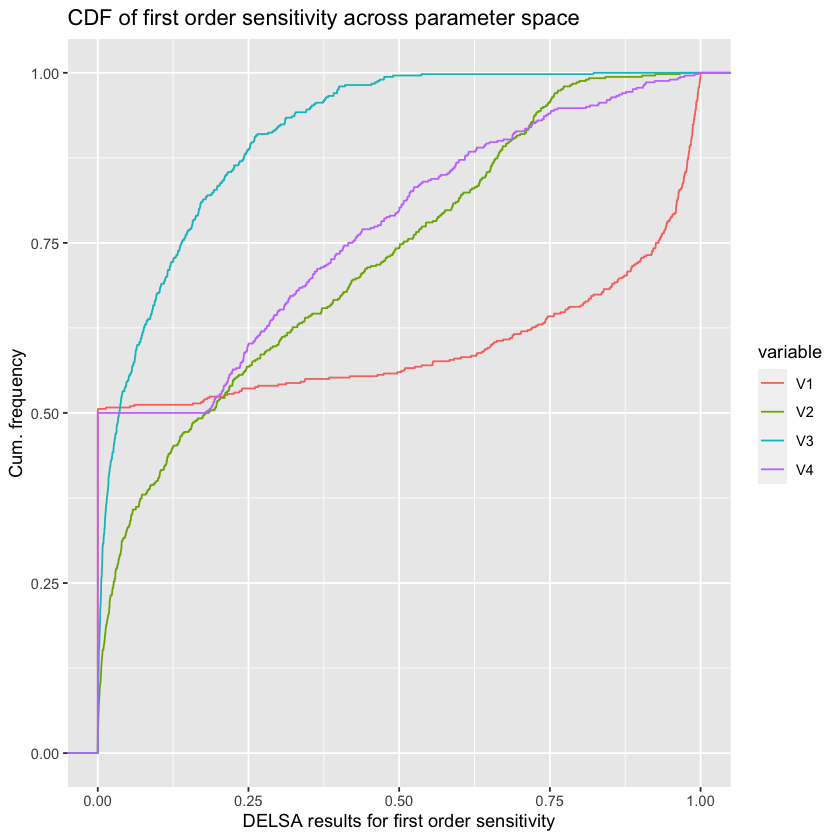

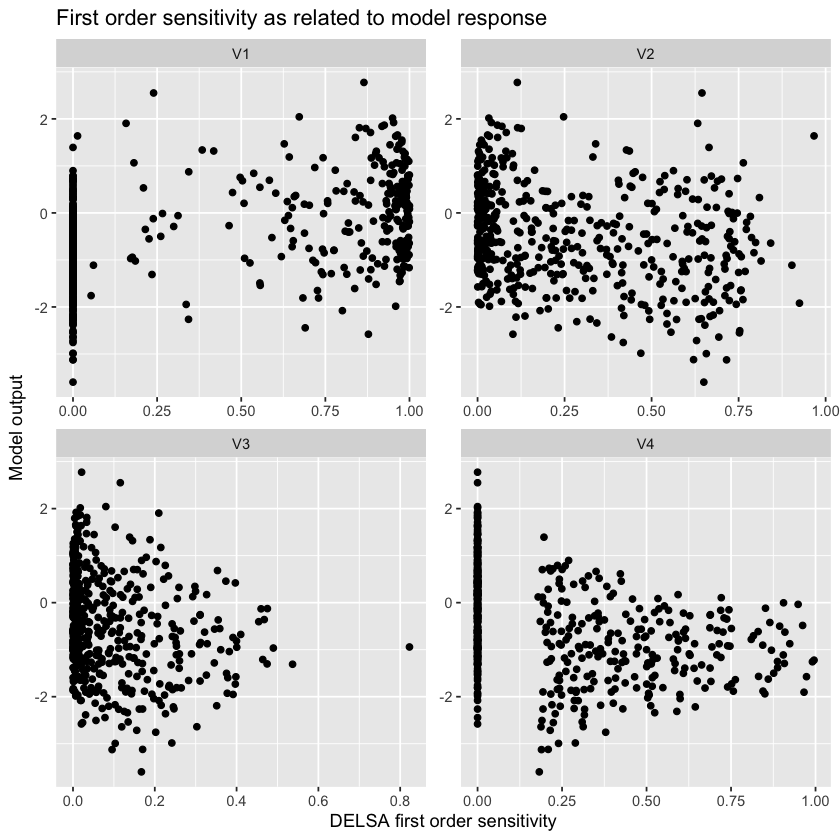

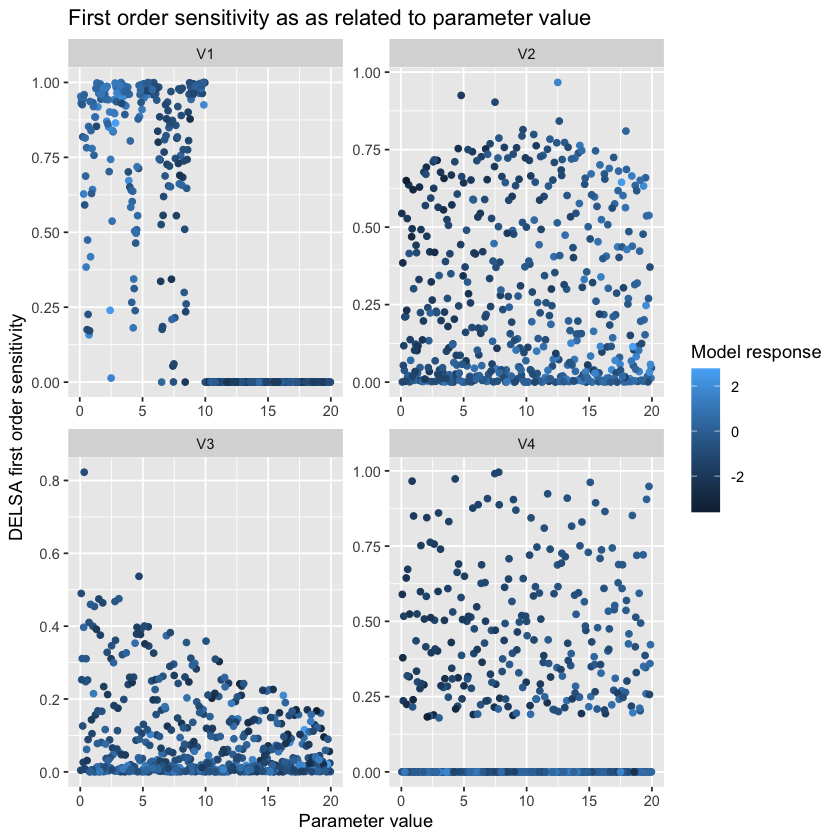

In [16]:
plot(delsa)

**Derivative-based global sensitivity measures**

$$\nu_j=\mathbb{E}\, \left(\frac{\partial f(\bf X)}{\partial x_j}\right)^2=\int \left(\frac{\partial f(\bf x)}{\partial x_j}\right)^2d\mu({\bf x})  \;, \,  \forall \, j=1, \ldots , d\, .$$

In [17]:
d<-4
delsa<-delsa(model=heterdisc.fun,perturb=1.01,par.ranges=replicate(d,c(0,20),
simplify=FALSE),samples=500,method="sobol")
print(delsa)
colMeans(delsa$deriv^2)


Call:
delsa(model = heterdisc.fun, perturb = 1.01, par.ranges = replicate(d,     c(0, 20), simplify = FALSE), samples = 500, method = "sobol")

Locations calculated: 500 

Model runs: 2500 

Summary of first order indices across parameter space:
       V1                  V2                  V3                 V4         
 Min.   :0.0000000   Min.   :0.0000073   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.0000000   1st Qu.:0.0264487   1st Qu.:0.005733   1st Qu.:0.00000  
 Median :0.0000562   Median :0.1817964   Median :0.035837   Median :0.08961  
 Mean   :0.4035076   Mean   :0.2730809   Mean   :0.091127   Mean   :0.23228  
 3rd Qu.:0.9268764   3rd Qu.:0.5064913   3rd Qu.:0.138825   3rd Qu.:0.41730  
 Max.   :0.9999927   Max.   :0.9667179   Max.   :0.822728   Max.   :0.99559  


[1] 1.023722124 0.013355885 0.003327516 0.005000000

**Let's come back to Morris' test fuction**
$$f({\bf x})=\beta_0+\sum_{i=1}^{20}\beta_iw_i+\sum_{1 \leq i<j\leq 20}\beta_{i,j}w_iw_j+\sum_{1 \leq i<j<l\leq20}\beta_{i,j,l}w_iw_jw_l+\sum_{1\leq i<j<l<s\leq20}\beta_{i,j,l,s}w_iw_jw_lw_s$$
where
$$w_i=2\times(x_i-\frac{1}{2}) \, , \; \forall \, i\neq3,5,7 \;\; \;w_i=2\times(1.1\frac{x_i}{x_i+0.1}-\frac{1}{2})\, , \; \forall \, i=3,5,7$$

$$\beta_i=20 \, , \; \forall \, i=1, \ldots, 10$$

$$\beta_{i,j}=-15 \, , \; \forall \, i,j=1,2, \ldots , 6 \; i<j$$

$$\beta_{i,j,l} =-10 \, , \; \forall \, i,j,l=1,2, \ldots , 5 \; i<j<l$$

$$\beta_{1,2,3,4}=5$$

$$X_i \sim \mathcal{U}\left([0,1]\right) \, , \; \forall \, i=1, \ldots , 20\,.$$

[1] 6.123259e+07 6.171588e+07 8.651818e+08 6.125407e+07 1.237134e+08
 [6] 3.399550e+06 5.658050e+02 3.329162e+04 1.476379e+04 1.042482e+04
[11] 8.910443e+03 3.090202e+04 1.475676e+04 1.972099e+04 2.164046e+04
[16] 7.705728e+03 6.773782e+03 8.383889e+03 1.168951e+05 9.673757e+04


Call:
delsa(model = morris.fun, perturb = 1.01, par.ranges = replicate(d,     c(0, 20), simplify = FALSE), samples = 500, method = "sobol")

Locations calculated: 500 

Model runs: 10500 

Summary of first order indices across parameter space:
       V1                 V2                V3                  V4           
 Min.   :0.000561   Min.   :0.00141   Min.   :0.0000000   Min.   :0.0007677  
 1st Qu.:0.128578   1st Qu.:0.12646   1st Qu.:0.0000004   1st Qu.:0.1288333  
 Median :0.253927   Median :0.25194   Median :0.0000046   Median :0.2587605  
 Mean   :0.308907   Mean   :0.31159   Mean   :0.0207562   Mean   :0.3106526  
 3rd Qu.:0.445039   3rd Qu.:0.46373   3rd Qu.:0.0000587   3rd Qu.:0.4483398  
 Max.   :0.898965   Max.   :0.93083   Max.   :0.9935221   Max.   :0.9027921  
       V5                  V6                  V7           
 Min.   :0.0000000   Min.   :3.694e-05   Min.   :0.000e+00  
 1st Qu.:0.0000007   1st Qu.:1.668e-02   1st Qu.:0.000e+00  
 Median :0.0000035   Media

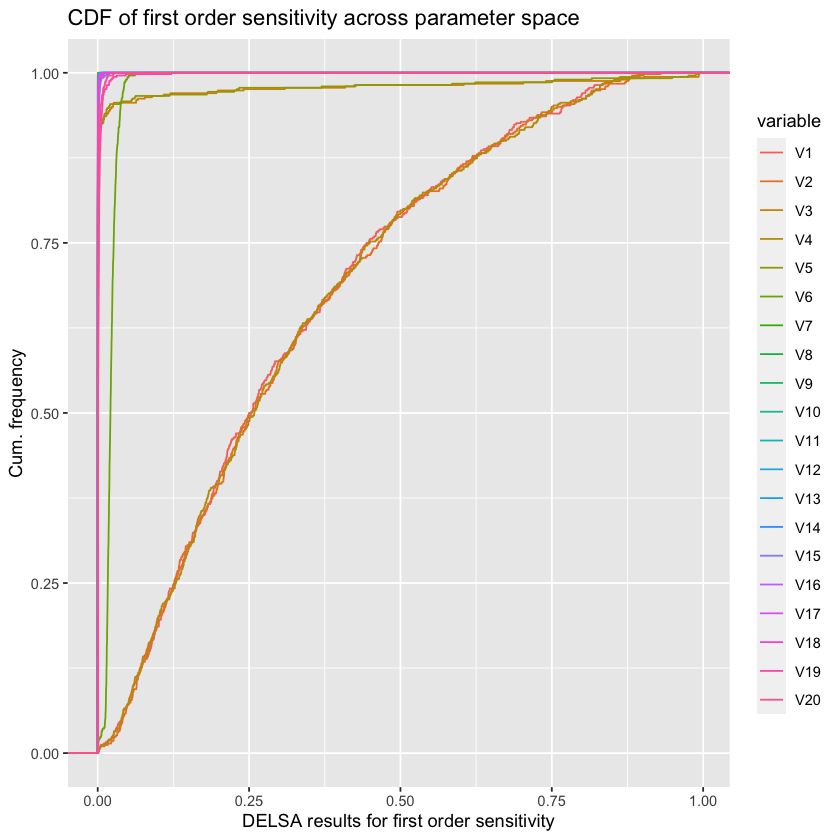

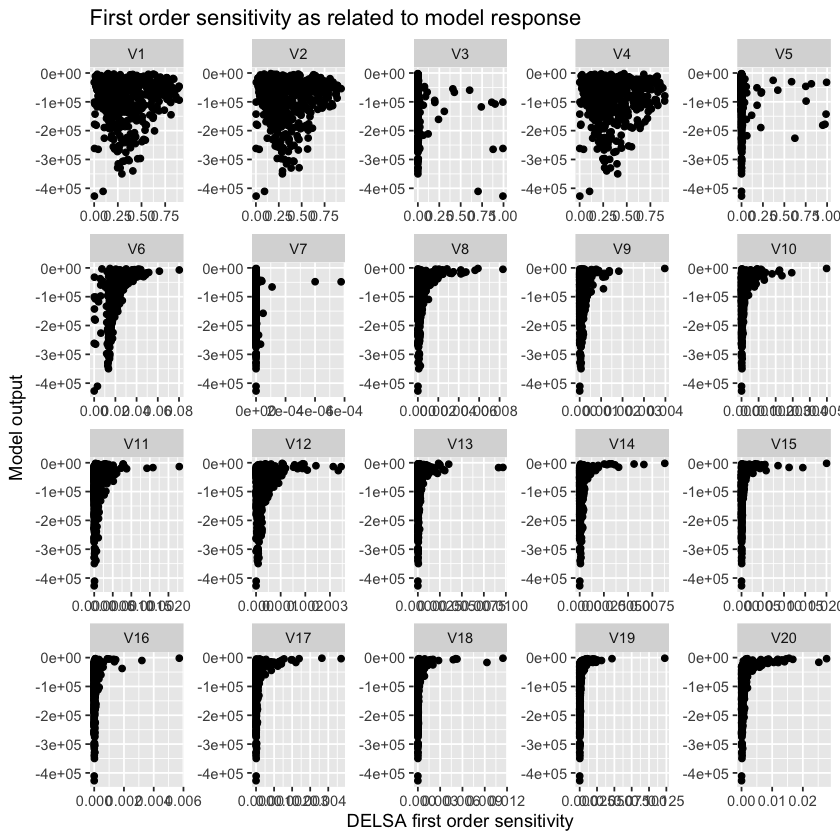

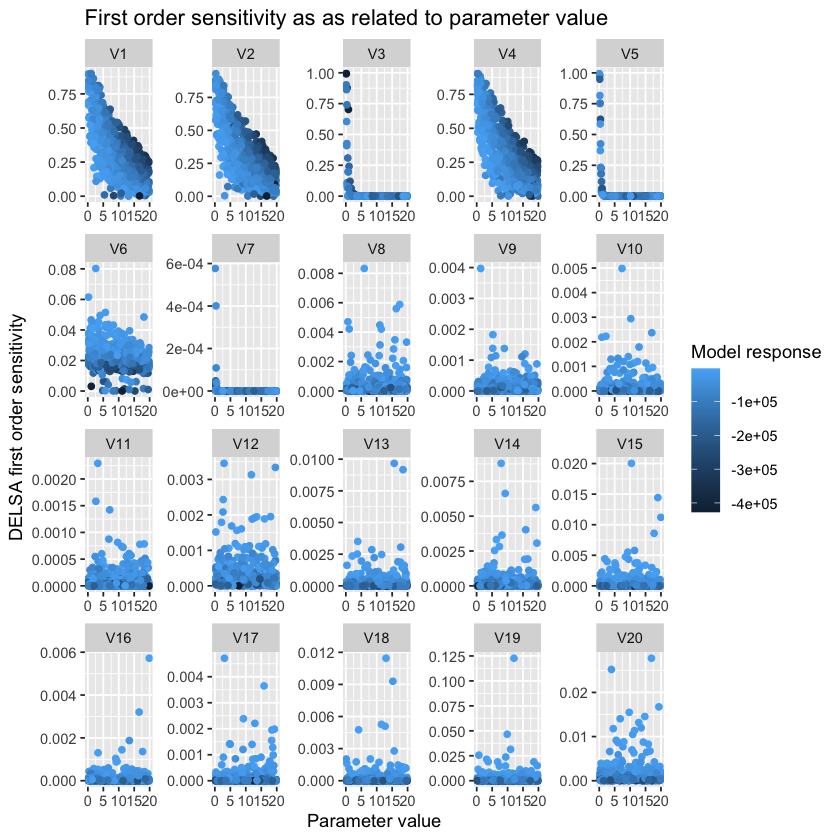

In [18]:
d<-20
delsa<-delsa(model=morris.fun,perturb=1.01,par.ranges=replicate(d,c(0,20),
simplify=FALSE),samples=500,method="sobol")
colMeans(delsa$deriv^2)
print(delsa)
plot(delsa)

**We compute first-order and second-order indices at a total cost of 2*N model evaluations**

Warning message in sobolrep(model = heterdisc.fun, factors = 4, n, nbrep = 1, nboot = 100):
“The value entered for N is not the square of a prime number. It has been replaced by: 961”



Call:
sobolrep(model = heterdisc.fun, factors = 4, N = n, nboot = 100,     nbrep = 1)

Model runs: 1922 

Model variance:
[1] 0.003933695

First-order indices:
      original          bias std. error   min. c.i.  max. c.i.
X1  0.80858507  3.057370e-04 0.01084547  0.78699757 0.82919057
X2 -0.02912973 -2.773980e-03 0.02902826 -0.08202814 0.01816873
X3  0.19083550 -4.997549e-05 0.02869698  0.13401099 0.24618898
X4  0.01337311 -3.444350e-05 0.03443577 -0.04779504 0.09035426

Closed second-order indices:
         original          bias std. error   min. c.i.  max. c.i.
X12  0.0294286505  0.0012607462 0.02959860 -0.01952617 0.08173746
X13 -0.0001077679 -0.0002619674 0.02796898 -0.05371333 0.05794390
X14 -0.0185348385 -0.0025273902 0.03571959 -0.09749979 0.04793318
X23  0.0233491435 -0.0004914748 0.05109563 -0.08675087 0.10885310
X24  0.0499522406  0.0004687762 0.05395833 -0.05640230 0.14697728
X34 -0.0149510676 -0.0059514576 0.05080169 -0.08747352 0.09131308


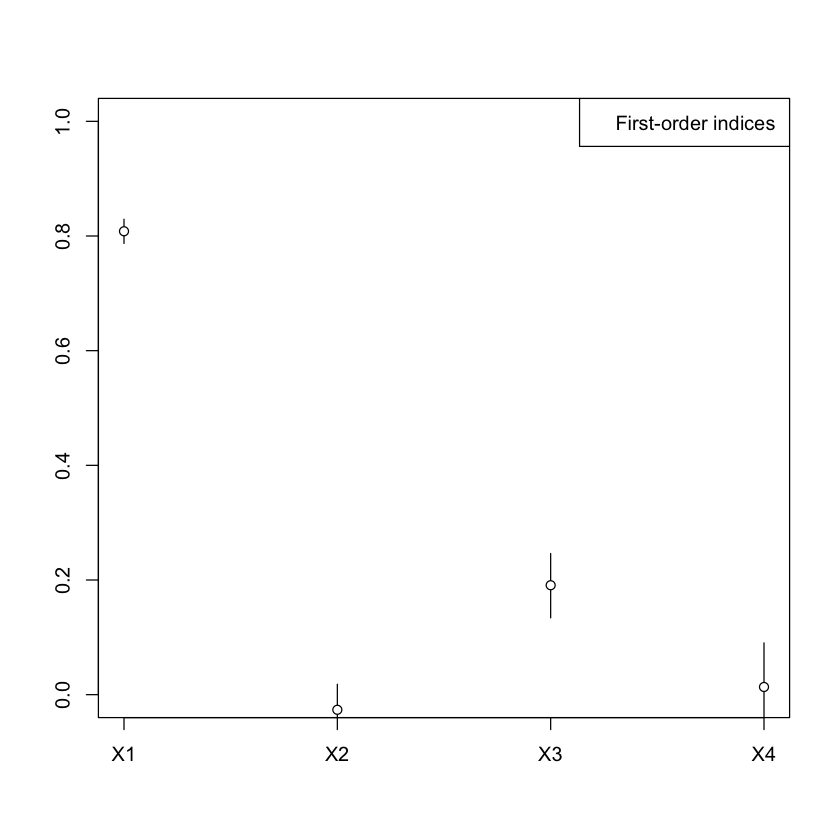

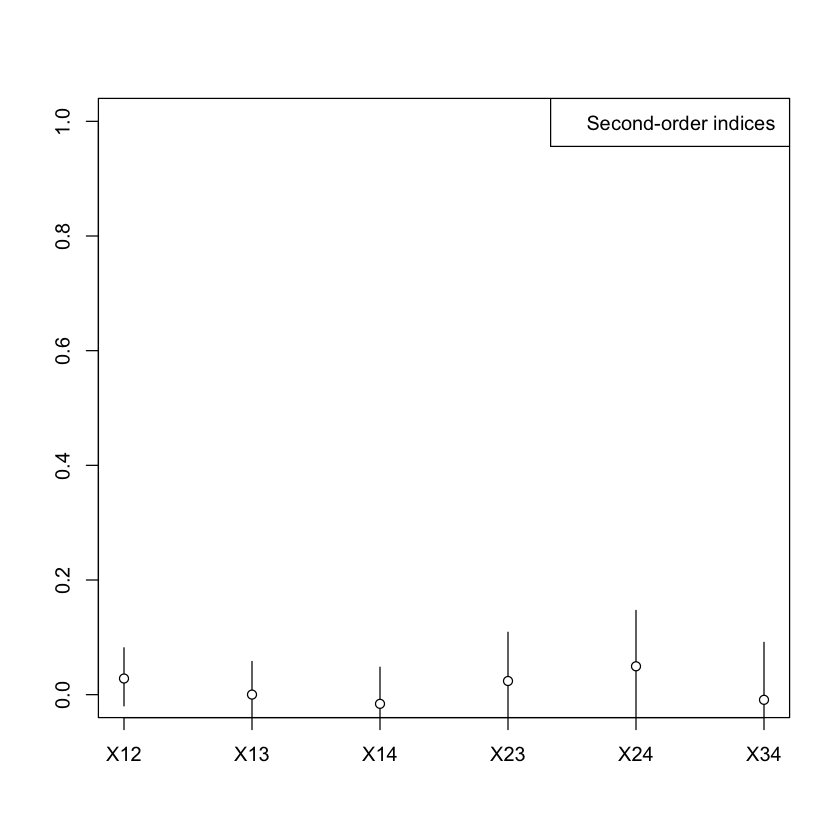

In [26]:
#Pour Heterdisk
library(boot)
library(sensitivity)
n <- 1000

# sensitivity analysis

x <- sobolrep(model = heterdisc.fun, factors=4,n, nbrep=1, nboot = 100)
print(x)
plot(x, choice=1)
plot(x, choice=2)


Warning message in sobolrep(model = morris.fun, factors = 20, n, nbrep = 1, nboot = 100):
“The value entered for N is not the square of a prime number. It has been replaced by: 961”



Call:
sobolrep(model = morris.fun, factors = 20, N = n, nboot = 100,     nbrep = 1)

Model runs: 1922 

Model variance:
[1] 1024.329

First-order indices:
         original          bias std. error   min. c.i.   max. c.i.
X1   2.052436e-03 -6.613473e-03 0.03707592 -0.06113250 0.076412307
X2   6.509008e-02 -8.687726e-04 0.03572449  0.01098634 0.140442469
X3   3.095579e-02  7.611557e-04 0.02927955 -0.02765612 0.078345835
X4   3.596978e-02 -1.675102e-03 0.03700628 -0.03731441 0.103170921
X5  -1.098119e-03 -1.535233e-03 0.02808290 -0.06565816 0.043394016
X6  -7.669425e-05  2.537303e-03 0.03541088 -0.08275122 0.053148209
X7   3.675747e-02  3.587879e-03 0.02923682 -0.03754626 0.081953622
X8   1.412537e-01  2.926590e-03 0.02914652  0.08633032 0.202630279
X9   1.174233e-01  7.575919e-05 0.03861118  0.04229957 0.179966319
X10  9.274947e-02  3.071070e-03 0.03205555  0.03467236 0.162250167
X11 -7.418599e-03 -5.120802e-03 0.03156885 -0.06396411 0.051900606
X12 -3.069114e-02  6.505306e-03 0.034856

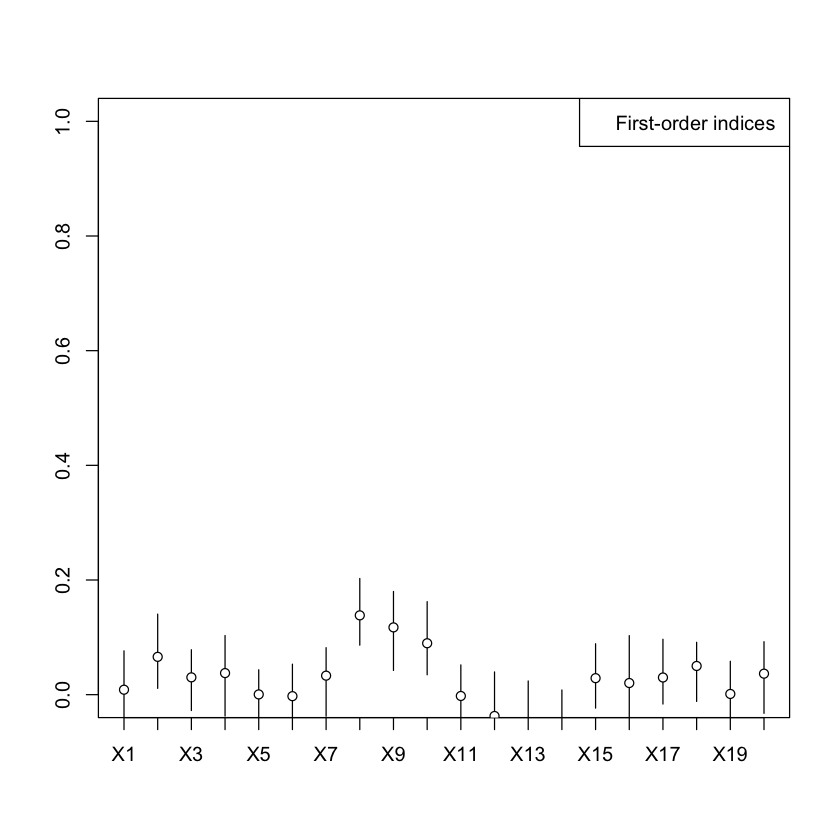

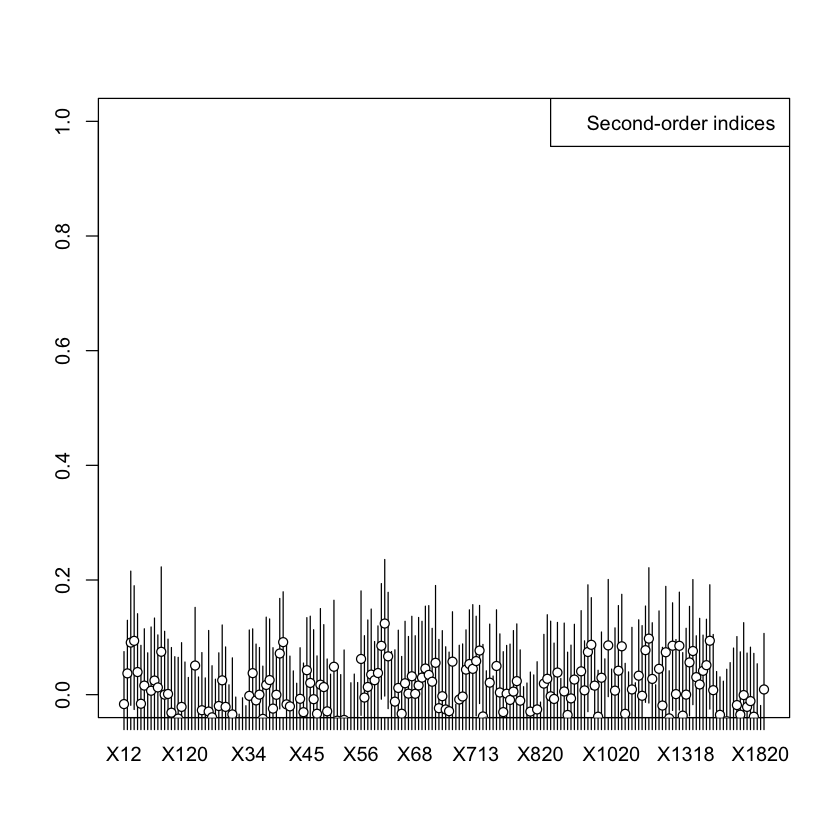

In [28]:
library(boot)
library(sensitivity)
n <- 1000

# sensitivity analysis

x <- sobolrep(model = morris.fun, factors=20,n, nbrep=1, nboot = 100)
print(x)
plot(x, choice=1)
plot(x, choice=2)

**We compute first-order, second-order and total Sobol'indices**

Warning message in sobolrep(model = heterdisc.fun, factors = 4, n, nbrep = 1, total = TRUE, :
“The value entered for N is not the square of a prime number. It has been replaced by: 961”



Call:
sobolrep(model = heterdisc.fun, factors = 4, N = n, nboot = 100,     nbrep = 1, total = TRUE)

Model runs: 5766 

Model variance:
[1] 0.004036145

First-order indices:
     original          bias  std. error   min. c.i.  max. c.i.
X1 0.81154582  0.0007771077 0.009395875  0.79539106 0.82852487
X2 0.04402914 -0.0061955772 0.031037940 -0.01402462 0.09995194
X3 0.16762082 -0.0006974063 0.029845006  0.12034566 0.21836936
X4 0.01568992 -0.0019680657 0.033131278 -0.03982465 0.08870774

Closed second-order indices:
        original          bias std. error   min. c.i.  max. c.i.
X12 -0.033631142  6.207879e-03 0.03287432 -0.08852285 0.03052189
X13  0.020183393 -7.646653e-05 0.03226807 -0.05150267 0.06834517
X14 -0.010585197  1.419140e-03 0.03355137 -0.08993395 0.04364987
X23 -0.001518034  3.611683e-03 0.05549884 -0.11009390 0.10815898
X24 -0.014099263  4.744334e-03 0.05532759 -0.11575772 0.09935779
X34  0.028566578  1.601690e-03 0.05682023 -0.08246184 0.11969516

Total-effect indices:
  

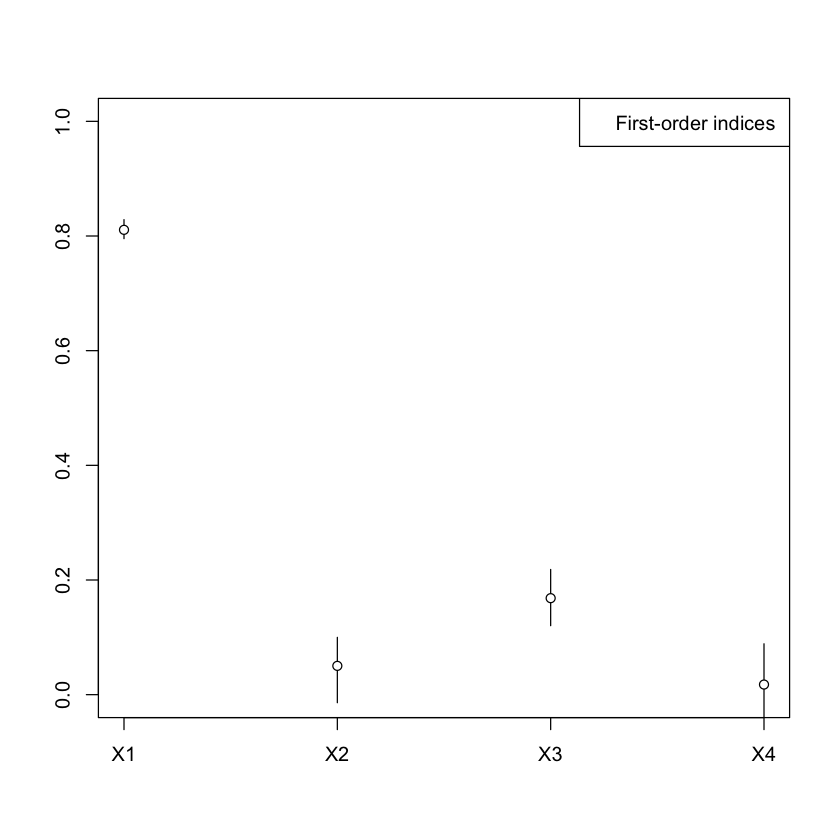

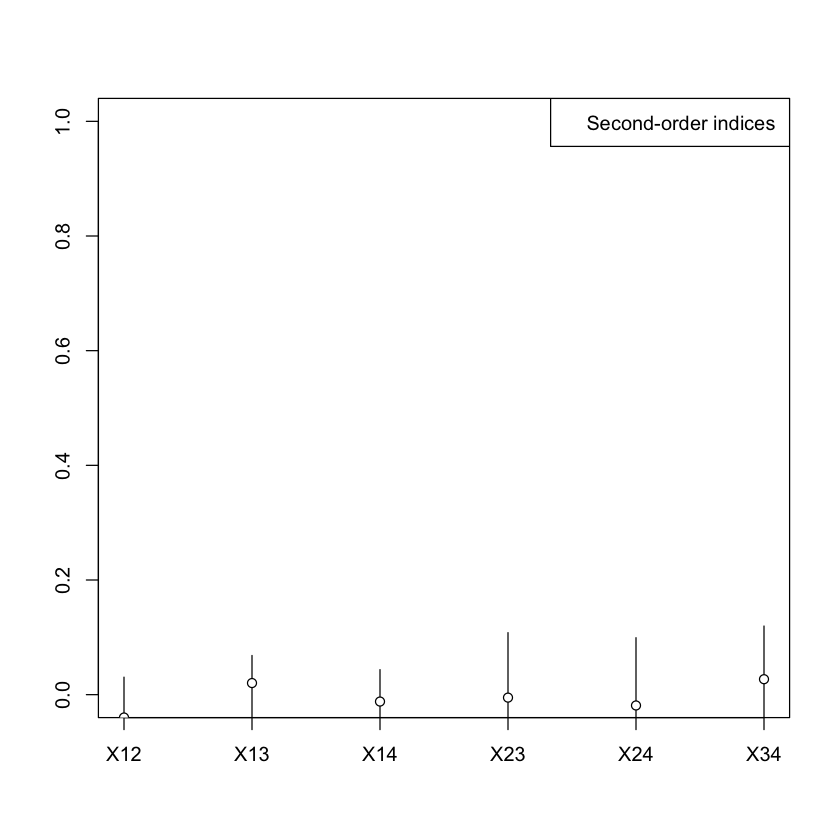

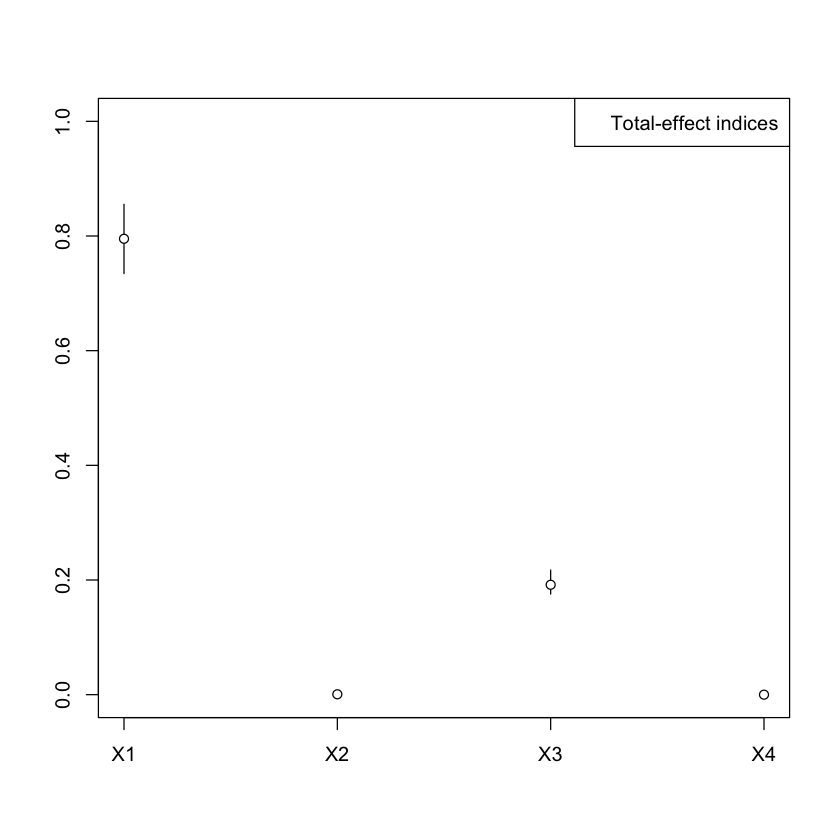

In [32]:
library(boot)
library(sensitivity)
n <- 1000

# sensitivity analysis

x <- sobolrep(model = heterdisc.fun, factors=4,n, nbrep=1, total=TRUE,nboot = 100)
print(x)
plot(x, choice=1)
plot(x, choice=2)
plot(x,choice=3)

Warning message in sobolrep(model = morris.fun, factors = 20, n, nbrep = 1, total = TRUE, :
“The value entered for N is not the square of a prime number. It has been replaced by: 961”



Call:
sobolrep(model = morris.fun, factors = 20, N = n, nboot = 100,     nbrep = 1, total = TRUE)

Model runs: 21142 

Model variance:
[1] 1108.412

First-order indices:
        original          bias std. error    min. c.i.   max. c.i.
X1   0.023640590 -3.583196e-03 0.02716608 -0.026285860 0.073513345
X2   0.048707269 -3.035723e-03 0.03094399 -0.004790904 0.115665527
X3   0.051682890 -2.630471e-03 0.03696775 -0.018105970 0.111576616
X4   0.045129137 -1.514685e-03 0.03166193 -0.000712186 0.114965144
X5  -0.018046487  5.191823e-03 0.03227167 -0.087417031 0.032982301
X6  -0.023789159 -1.189755e-03 0.02803188 -0.076913290 0.026839363
X7   0.021337782  3.022459e-06 0.02831336 -0.027341197 0.073709060
X8   0.122273644  3.486751e-03 0.03723703  0.057372071 0.187660696
X9   0.190634820  1.714102e-03 0.03501455  0.116113420 0.243448496
X10  0.138692880 -3.259594e-03 0.03278406  0.083879731 0.210854824
X11 -0.004796837 -2.034399e-03 0.03273488 -0.060872911 0.055384069
X12 -0.001764405 -7.59135

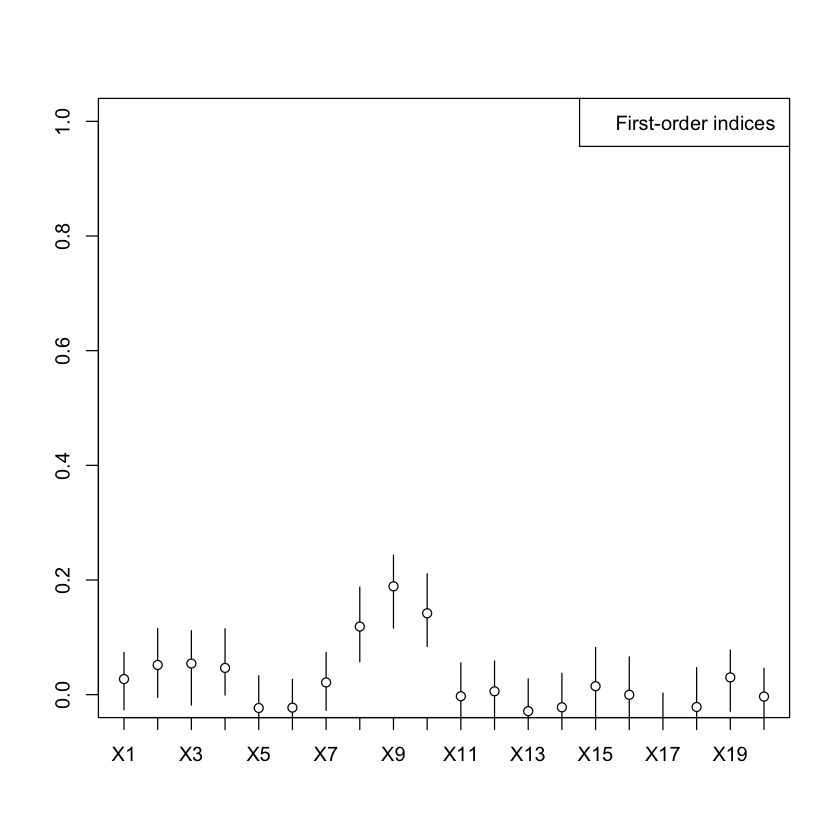

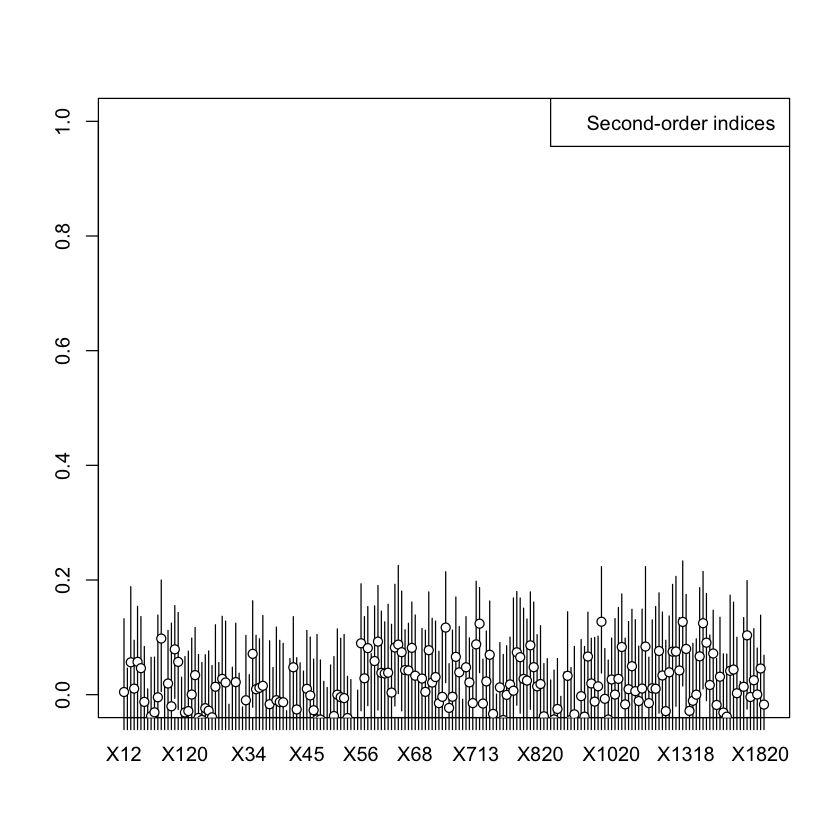

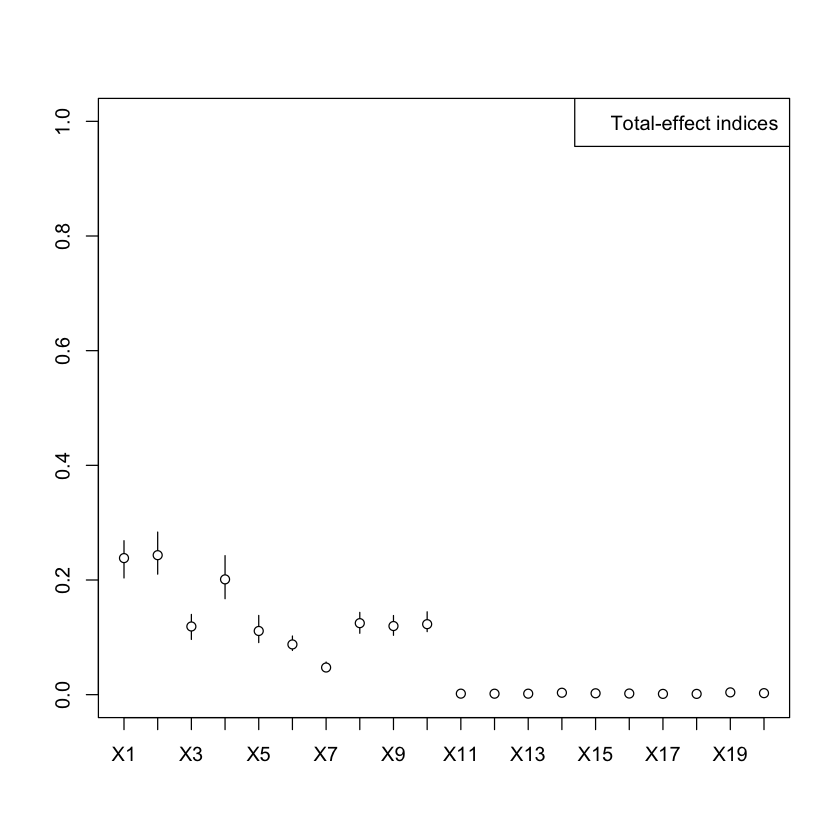

In [33]:
library(boot)
library(sensitivity)
n <- 1000

# sensitivity analysis

x <- sobolrep(model = morris.fun, factors=20,n, nbrep=1, total=TRUE,nboot = 100)
print(x)
plot(x, choice=1)
plot(x, choice=2)
plot(x,choice=3)